In [1]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
import pandas as pd

GET DESCRIPTORS

In [2]:
# Function to compute descriptors from SMILES
def get_descriptors(smiles, descriptor_names):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(mol)
    return descriptors

# List of descriptor names
descriptor_names = [desc[0] for desc in Descriptors._descList]

# Read the input CSV file
input_csv = r"C:\Users\thanh\PycharmProjects\pythonProject\CHA\converted_smiles.csv"  # Update with your input file path
df = pd.read_csv(input_csv)

# Compute descriptors for each molecule
descriptor_values = df['SMILES'].apply(lambda x: get_descriptors(x, descriptor_names))
descriptor_df = pd.DataFrame(descriptor_values.tolist(), columns=descriptor_names)

# Combine the original dataframe with the descriptor dataframe
result_df = pd.concat([df, descriptor_df], axis=1)

# Write the output to a new CSV file
output_csv = 'molecules_with_descriptors.csv'  # Update with your desired output file path
result_df.to_csv(output_csv, index=False)

print(f"Descriptors have been computed and saved to {output_csv}")

[18:11:30] Can't kekulize mol.  Unkekulized atoms: 3 4 6 7 8
Traceback (most recent call last):
  File "C:\Users\thanh\.conda\envs\CHA\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "C:\Users\thanh\.conda\envs\CHA\lib\site-packages\rdkit\Chem\SpacialScore.py", line 72, in SPS
    return _SpacialScore(mol, normalize=normalize).score
  File "C:\Users\thanh\.conda\envs\CHA\lib\site-packages\rdkit\Chem\SpacialScore.py", line 95, in __init__
    self.score /= self.mol.GetNumHeavyAtoms()
ZeroDivisionError: division by zero
[18:11:33] WARNING: not removing hydrogen atom without neighbors
[18:11:33] WARNING: not removing hydrogen atom without neighbors
[18:11:33] WARNING: not removing hydrogen atom without neighbors
[18:11:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[18:11:48] WARNING: not removing hydrogen atom without neighbors
[18:11:48] WARNING: not removing hydrogen atom without neighbors
[18:11:48] WARNING

Descriptors have been computed and saved to molecules_with_descriptors.csv


In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
# Load the CSV file
input_csv = 'molecules_with_descriptors.csv'
df = pd.read_csv(input_csv)


# Identify and replace infinite values with NaN
descriptor_columns = df.columns[2:]  # Assuming descriptors start from the third column
df[descriptor_columns] = df[descriptor_columns].replace([np.inf, -np.inf], np.nan)

# Replace NaN with mean of the column
df[descriptor_columns] = df[descriptor_columns].fillna(df[descriptor_columns].mean())

# Standardize descriptor columns
scaler = StandardScaler()
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

In [5]:
# Save the standardized DataFrame to a new CSV file
df.to_csv(output_csv, index=False)
print(f"Descriptors have been standardized and saved to {output_csv}")

Descriptors have been standardized and saved to molecules_with_descriptors.csv


REMOVING ZERO VARIANCE DESCRIPTORS

In [6]:
# Load the CSV file
input_csv = 'molecules_with_standardized_descriptors.csv'
df = pd.read_csv(input_csv)

# Calculate variance of descriptor columns
descriptor_columns = df.columns[2:]  # Assuming descriptors start from the third column
variances = df[descriptor_columns].var()

# Filter columns with non-zero variance
non_zero_variance_columns = variances[variances != 0].index

# Filter the DataFrame to keep only columns with non-zero variance
df_filtered = df[['Name', 'SMILES'] + list(non_zero_variance_columns)]

# Save the filtered DataFrame to a new CSV file
output_csv = 'molecules_with_nonzero_variance_descriptors.csv'
df_filtered.to_csv(output_csv, index=False)

PermissionError: [Errno 13] Permission denied: 'molecules_with_nonzero_variance_descriptors.csv'

In [ ]:
# Load the CSV file
input_csv = 'molecules_with_nonzero_variance_descriptors.csv' #placeholder: put molecules_with_toxicity.csv or wutever named
df = pd.read_csv(input_csv)

# Check the structure of the DataFrame
print(df.head())

MODELS

In [8]:
import pickle

In [9]:
df_te = pickle.load(open(r"C:\Users\thanh\PycharmProjects\pythonProject\CHA\test_final.pkl", "rb" ))
print(df_te.head())

                                                Name  \
0  9,10-Anthracenedione, 1,8-diamino-2-bromo-4,5-...   
1                     Hydroxyethyldiethylenetriamine   
2                                 Tricetamide [USAN]   
3  Acetic acid, (3-(N-methylacetamido)-2,4,6-trii...   
4    Succinic acid, mono(1-(1-adamantyl)ethyl) ester   

                                             SMILES         CAS Score  Target  \
0  NC1=C2C(=O)C3=C(N)C(Br)=CC(O)=C3C(=O)C2=C(O)C=C1  65235-63-4     L       0   
1                                        NCCNCCNCCO   1965-29-3     L       0   
2        CCN(CC)C(=O)CNC(=O)C1=CC(OC)=C(OC)C(OC)=C1    363-20-2     L       0   
3             CN(C(C)=O)C1=C(I)C=C(I)C(CC(O)=O)=C1I  29193-32-6     L       0   
4            CC(OC(=O)CCC(O)=O)C12CC3CC(CC(C3)C1)C2  18484-32-7     L       0   

   Mol_ID                              SMILES_final  \
0    1250  Nc1ccc(O)c2c1C(=O)c1c(N)c(Br)cc(O)c1C2=O   
1    2012                                NCCNCCNCCO   
2    2308  

In [10]:
df_tr = pickle.load(open(r"C:\Users\thanh\PycharmProjects\pythonProject\CHA\train_final.pkl", "rb" ))
print(df_tr.head())

                                                Name  \
0  3-Pyridinecarboxamide, N-(4-(4-chlorophenyl)-6...   
1  3-Pyridinecarboxylic acid, 3-(4-((4-chlorophen...   
2  2-Oxazolidinone, 5-(aminomethyl)-3-(4-(2-(3-ch...   
3                    Benzoic acid, 5-amino-2-butoxy-   
4                                  Terramycin sodium   

                                              SMILES         CAS Score  \
0  ClC1=CC=C(C=C1)C1=NC(NC(=O)C2=CC=CN=C2)=NC(=N1...  85633-10-9     L   
1  ClC1=CC=C(COC2=CC=C(CCCOC(=O)C3=CC=CN=C3)C=C2)...  83123-62-0     L   
2  Cl.NCC1CN(C(=O)O1)C1=CC=C(CCC2=CC(Cl)=C(F)C=C2...  84459-93-8     L   
3                        CCCCOC1=C(C=C(N)C=C1)C(O)=O  13737-90-1     L   
4  [Na+].CN(C)C1C2C(O)C3C(=C(O)C2([O-])C(=O)C(C(N...  69766-62-7     L   

   Target  Mol_ID                                       SMILES_final  \
0       0    2953    O=C(Nc1nc(-c2ccc(Cl)cc2)nc(N2CCOCC2)n1)c1cccnc1   
1       0    1927          O=C(OCCCc1ccc(OCc2ccc(Cl)cc2)cc1)c1cccnc1   
2 

In [11]:
X_train = np.vstack(df_tr['Physchem_scaled'].to_numpy())
X_test = np.vstack(df_te['Physchem_scaled'].to_numpy())
y_train = df_tr['Target'].to_numpy().reshape(-1)
y_test = df_te['Target'].to_numpy().reshape(-1)

RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict toxicity categories on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report & confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.67      0.23      0.34        79
           1       0.67      0.93      0.78       289
           2       0.35      0.10      0.15        71
           3       0.60      0.29      0.39        21

    accuracy                           0.65       460
   macro avg       0.57      0.39      0.42       460
weighted avg       0.62      0.65      0.59       460

[[ 18  58   3   0]
 [  9 270   7   3]
 [  0  63   7   1]
 [  0  12   3   6]]


In [14]:
# Optimize the model
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation (5-fold CV)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best Cross-Validation Score:
0.6321525885558583


In [15]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.63      1.00      0.77       289
           2       0.00      0.00      0.00        71
           3       1.00      0.10      0.17        21

    accuracy                           0.63       460
   macro avg       0.41      0.27      0.24       460
weighted avg       0.44      0.63      0.49       460



C:\Users\thanh\.conda\envs\CHA\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thanh\.conda\envs\CHA\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thanh\.conda\envs\CHA\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.27380952380952384


DECISION TREE

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter distributions for Random Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Perform Randomized Search with cross-validation (5-fold CV), sampling 100 combinations
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit Randomized Search to find the best parameters
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters Found:")
print(random_search.best_params_)
print("Best Cross-Validation Score:")
print(random_search.best_score_)

# Evaluate the best model on the test set
best_dt_classifier = random_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters Found:
{'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}
Best Cross-Validation Score:
0.5940054495912805

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        79
           1       0.66      0.74      0.70       289
           2       0.26      0.20      0.22        71
           3       0.54      0.33      0.41        21

    accuracy                           0.56       460
   macro avg       0.44      0.39      0.41       460
weighted avg       0.53      0.56      0.54       460



In [18]:
print(balanced_accuracy_score(y_test, y_pred))

0.38507096335330243


EXTRA TREES

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Define the model
et_classifier = ExtraTreesClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation (5-fold CV)
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_et_classifier = grid_search.best_estimator_
y_pred = best_et_classifier.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score:
0.6523160762942779

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.18      0.28        79
           1       0.66      0.95      0.78       289
           2       0.40      0.08      0.14        71
           3       0.80      0.19      0.31        21

    accuracy                           0.65       460
   macro avg       0.63      0.35      0.38       460
weighted avg       0.63      0.65      0.57       460



In [20]:
print(balanced_accuracy_score(y_test, y_pred))

0.35093887900718373


K-Nearest Neighbors

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters Found:
{'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Score:
0.6430517711171663

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.23      0.31        79
           1       0.66      0.85      0.75       289
           2       0.26      0.13      0.17        71
           3       0.62      0.38      0.47        21

    accuracy                           0.61       460
   macro avg       0.50      0.40      0.42       460
weighted avg       0.56      0.61      0.57       460

ROC AUC Score: 0.7158


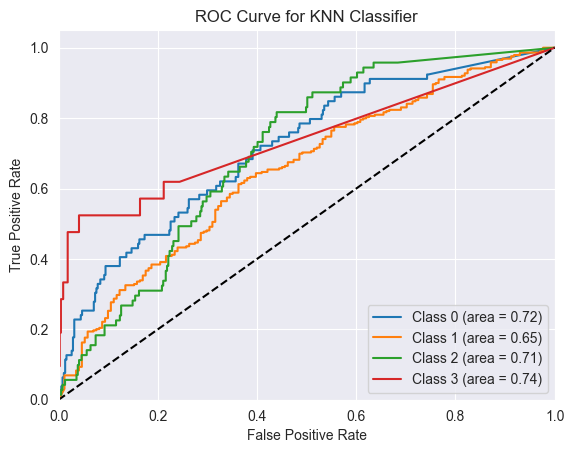

In [22]:
# Define the model
knn_classifier = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# Perform Grid Search with cross-validation (5-fold CV)
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit Grid Search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_knn_classifier = grid_search.best_estimator_
y_pred = best_knn_classifier.predict(X_test)
y_pred_proba = best_knn_classifier.predict_proba(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])

plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()

In [23]:
print(balanced_accuracy_score(y_test, y_pred))

0.3975580814688255


In [24]:
from sklearn.inspection import permutation_importance

# For KNN, use permutation importance
result_knn = permutation_importance(best_knn_classifier, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
feature_importances_knn = result_knn.importances_mean

ENSEMBLE MODEL

In [25]:
from sklearn.ensemble import VotingClassifier

In [26]:
# Define the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', best_dt_classifier),
    ('rf', best_rf_classifier),
    ('knn', best_knn_classifier),
    ('et', best_et_classifier)
], voting='soft')

In [27]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=5,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=11,
                                                   weights='distance')),
                             ('et',
                              ExtraTreesClassifier(max_depth=20,
                                                   min_samples_split=5,
                                                   random_state=42))],
                 voting='soft')

In [28]:
# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Print classification report
print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))


Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        79
           1       0.66      0.93      0.78       289
           2       0.28      0.07      0.11        71
           3       0.70      0.33      0.45        21

    accuracy                           0.65       460
   macro avg       0.56      0.38      0.41       460
weighted avg       0.59      0.65      0.57       460



In [29]:
print(balanced_accuracy_score(y_test, y_pred_voting))

0.3819713354073604


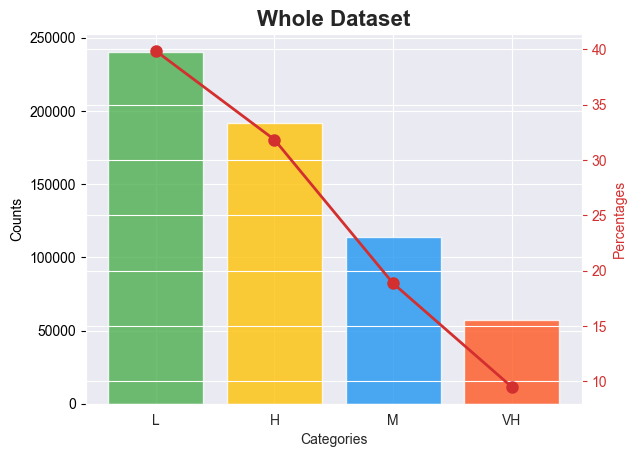

In [36]:
import matplotlib.pyplot as plt

# Data
categories = ['L', 'H', 'M', 'VH']
counts = [240450, 192064, 113664, 57214]
percentages = [39.85, 31.83, 18.84, 9.48]

# Create figure and axis
fig, ax1 = plt.subplots()

# Define colors for the bars
bar_colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722']

# Plot the bar chart for counts
bars = ax1.bar(categories, counts, color=bar_colors, alpha=0.8)
ax1.set_xlabel('Categories')
ax1.set_ylabel('Counts', color='black')
ax1.tick_params('y', colors='black')

# Create a secondary axis for the percentages
ax2 = ax1.twinx()
ax2.plot(categories, percentages, color='#D32F2F', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('Percentages', color='#D32F2F')
ax2.tick_params('y', colors='#D32F2F')

# Titles and labels
plt.title('Whole Dataset', fontsize=16, fontweight='bold')

# Show plot
plt.show()

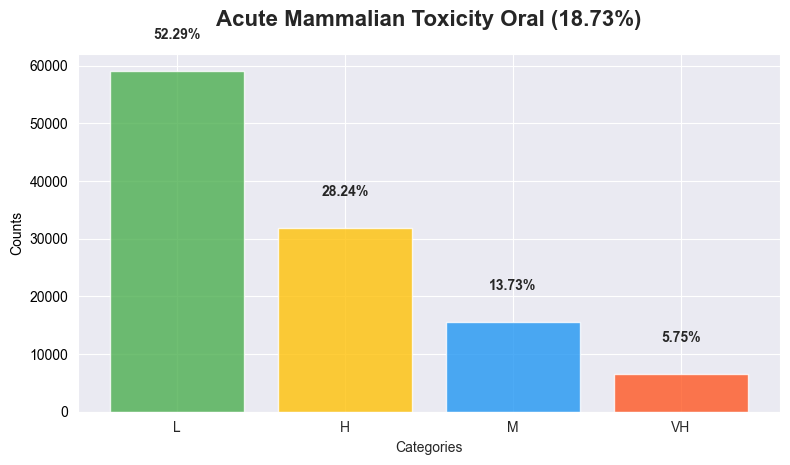

In [53]:
# Data
categories = ['L', 'H', 'M', 'VH']
counts = [59104, 31917, 15517, 6501]
percentages = [52.29, 28.24, 13.73, 5.75]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))  # Increase the figure size

# Define colors for the bars
bar_colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722']

# Plot the bar chart for counts
bars = ax1.bar(categories, counts, color=bar_colors, alpha=0.8)
ax1.set_xlabel('Categories')
ax1.set_ylabel('Counts', color='black')
ax1.tick_params('y', colors='black')

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{percentage}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Acute Mammalian Toxicity Oral (18.73%)', fontsize=16, fontweight='bold', pad=20)  # Add padding to the title

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

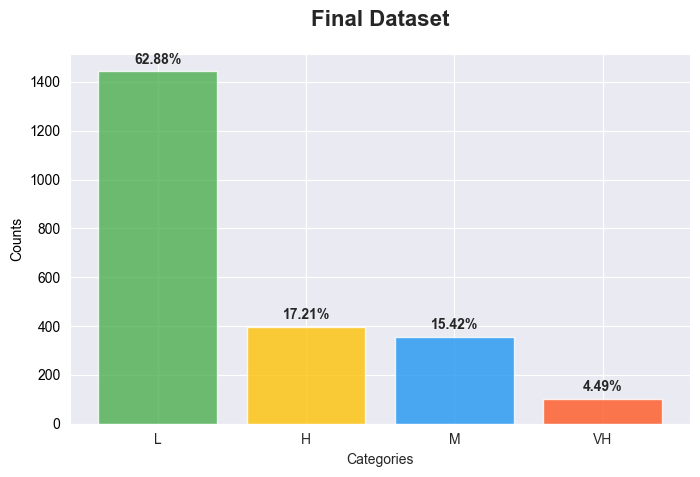

In [63]:
import matplotlib.pyplot as plt

# Data
categories = ['L', 'H', 'M', 'VH']
counts = [1443, 395, 354, 103]
percentages = [62.88, 17.21, 15.42, 4.49]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))  # Increase the figure size

# Define colors for the bars
bar_colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722']

# Plot the bar chart for counts
bars = ax1.bar(categories, counts, color=bar_colors, alpha=0.8)
ax1.set_xlabel('Categories')
ax1.set_ylabel('Counts', color='black')
ax1.tick_params('y', colors='black')

# Add percentages on top of each bar with a smaller offset
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 20, f'{percentage}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Final Dataset', fontsize=16, fontweight='bold', pad=20)  # Add padding to the title

# Adjust margins
plt.subplots_adjust(top=0.85)

# Show plot
plt.show()

In [76]:
descriptorload = pd.read_csv(r"C:\Users\thanh\PycharmProjects\pythonProject\CHA\molecules_with_standardized_descriptors.csv")
features = descriptorload.drop(['Name', 'SMILES'], axis=1)

In [77]:
# Get feature importances for Decision Tree
dt_importances = best_dt_classifier.feature_importances_

# Print feature importances for Decision Tree
print("\nDecision Tree Feature Importances:")
for feature, importance in zip(features, dt_importances):
    print(f"{feature}: {importance:.4f}")


Decision Tree Feature Importances:
MaxAbsEStateIndex: 0.0000
MaxEStateIndex: 0.0244
MinAbsEStateIndex: 0.0133
MinEStateIndex: 0.0090
qed: 0.0000
SPS: 0.0094
MolWt: 0.0000
HeavyAtomMolWt: 0.0000
ExactMolWt: 0.0000
NumValenceElectrons: 0.0120
NumRadicalElectrons: 0.0000
MaxPartialCharge: 0.0490
MinPartialCharge: 0.0272
MaxAbsPartialCharge: 0.0000
MinAbsPartialCharge: 0.0000
FpDensityMorgan1: 0.0085
FpDensityMorgan2: 0.0159
FpDensityMorgan3: 0.0123
BCUT2D_MWHI: 0.0195
BCUT2D_MWLOW: 0.0000
BCUT2D_CHGHI: 0.0643
BCUT2D_CHGLO: 0.0125
BCUT2D_LOGPHI: 0.0279
BCUT2D_LOGPLOW: 0.0184
BCUT2D_MRHI: 0.0492
BCUT2D_MRLOW: 0.0113
AvgIpc: 0.0077
BalabanJ: 0.0093
BertzCT: 0.0206
Chi0: 0.0307
Chi0n: 0.0000
Chi0v: 0.0000
Chi1: 0.0000
Chi1n: 0.0000
Chi1v: 0.0065
Chi2n: 0.0108
Chi2v: 0.0000
Chi3n: 0.0119
Chi3v: 0.0000
Chi4n: 0.0241
Chi4v: 0.0107
HallKierAlpha: 0.0102
Ipc: 0.0000
Kappa1: 0.0057
Kappa2: 0.0041
Kappa3: 0.0062
LabuteASA: 0.0000
PEOE_VSA1: 0.0169
PEOE_VSA10: 0.0000
PEOE_VSA11: 0.0000
PEOE_VSA12: 0

In [78]:
# Check the length of features.columns and dt_importances
print(len(features.columns))  # Should match the number of features
print(len(dt_importances))    # Should match the number of features

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': dt_importances})

210
210


In [79]:
# Assuming you have already trained your Decision Tree classifier
dt_importances = best_dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': dt_importances})

# Sort the DataFrame by importance descending
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nDecision Tree Feature Importances (High to Low):")
for index, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


Decision Tree Feature Importances (High to Low):
BCUT2D_CHGHI: 0.0643
BCUT2D_MRHI: 0.0492
MaxPartialCharge: 0.0490
SMR_VSA1: 0.0378
SMR_VSA2: 0.0324
Chi0: 0.0307
SMR_VSA6: 0.0286
BCUT2D_LOGPHI: 0.0279
MinPartialCharge: 0.0272
PEOE_VSA9: 0.0258
MaxEStateIndex: 0.0244
Chi4n: 0.0241
EState_VSA8: 0.0238
SlogP_VSA2: 0.0216
BertzCT: 0.0206
VSA_EState8: 0.0205
BCUT2D_MWHI: 0.0195
BCUT2D_LOGPLOW: 0.0184
PEOE_VSA7: 0.0184
PEOE_VSA1: 0.0169
FpDensityMorgan2: 0.0159
SlogP_VSA3: 0.0151
EState_VSA3: 0.0151
MinAbsEStateIndex: 0.0133
MolLogP: 0.0130
SlogP_VSA8: 0.0129
BCUT2D_CHGLO: 0.0125
SlogP_VSA5: 0.0124
PEOE_VSA8: 0.0123
FpDensityMorgan3: 0.0123
NumValenceElectrons: 0.0120
SlogP_VSA1: 0.0120
Chi3n: 0.0119
BCUT2D_MRLOW: 0.0113
Chi2n: 0.0108
Chi4v: 0.0107
SlogP_VSA11: 0.0105
SMR_VSA10: 0.0105
HallKierAlpha: 0.0102
VSA_EState2: 0.0099
SPS: 0.0094
BalabanJ: 0.0093
EState_VSA4: 0.0090
MinEStateIndex: 0.0090
FractionCSP3: 0.0089
PEOE_VSA12: 0.0085
FpDensityMorgan1: 0.0085
AvgIpc: 0.0077
PEOE_VSA5: 0.0

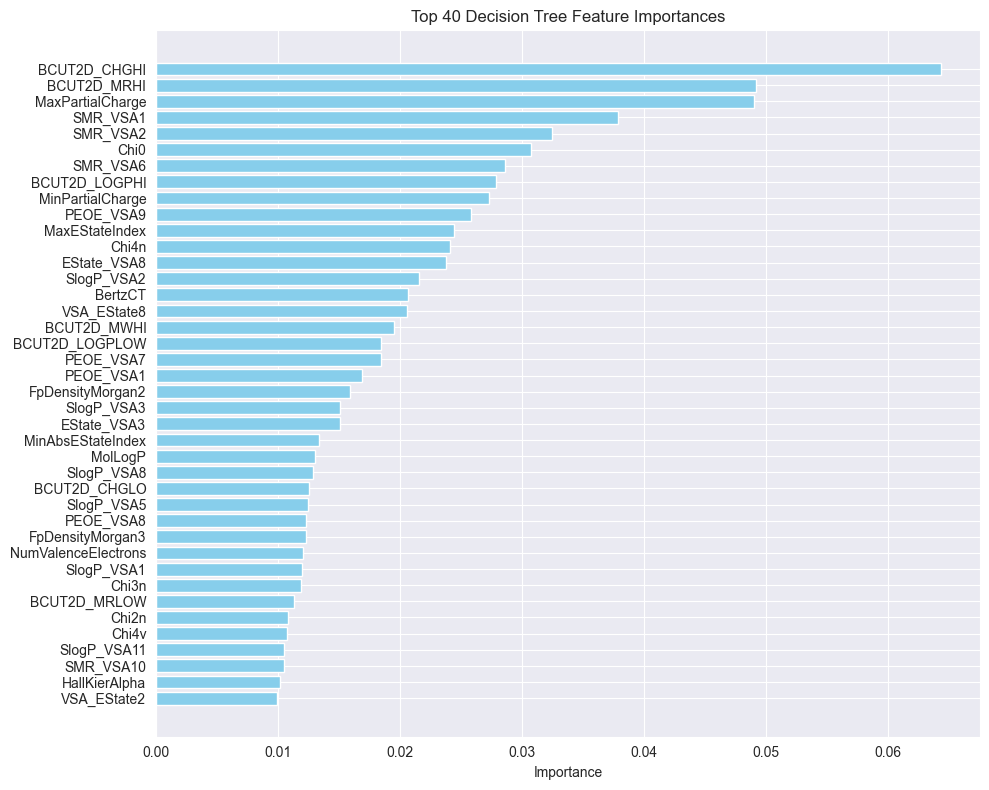

In [84]:
# Sort the DataFrame by importance descending
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 40  # Adjust this number as needed
top_importance_df = importance_df.head(top_n)

# Plot top N feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_importance_df['Feature'], top_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()


In [86]:
# Assuming `importance_df` contains feature names and their importances
# Filter features with importance greater than 0.001
filtered_importance_df = importance_df[importance_df['Importance'] > 0.001]

# Print feature importances above the threshold
print("\nDecision Tree Feature Importances (Importance > 0.001):")
for index, row in filtered_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print(len(filtered_importance_df))


Decision Tree Feature Importances (Importance > 0.001):
BCUT2D_CHGHI: 0.0643
BCUT2D_MRHI: 0.0492
MaxPartialCharge: 0.0490
SMR_VSA1: 0.0378
SMR_VSA2: 0.0324
Chi0: 0.0307
SMR_VSA6: 0.0286
BCUT2D_LOGPHI: 0.0279
MinPartialCharge: 0.0272
PEOE_VSA9: 0.0258
MaxEStateIndex: 0.0244
Chi4n: 0.0241
EState_VSA8: 0.0238
SlogP_VSA2: 0.0216
BertzCT: 0.0206
VSA_EState8: 0.0205
BCUT2D_MWHI: 0.0195
BCUT2D_LOGPLOW: 0.0184
PEOE_VSA7: 0.0184
PEOE_VSA1: 0.0169
FpDensityMorgan2: 0.0159
SlogP_VSA3: 0.0151
EState_VSA3: 0.0151
MinAbsEStateIndex: 0.0133
MolLogP: 0.0130
SlogP_VSA8: 0.0129
BCUT2D_CHGLO: 0.0125
SlogP_VSA5: 0.0124
PEOE_VSA8: 0.0123
FpDensityMorgan3: 0.0123
NumValenceElectrons: 0.0120
SlogP_VSA1: 0.0120
Chi3n: 0.0119
BCUT2D_MRLOW: 0.0113
Chi2n: 0.0108
Chi4v: 0.0107
SlogP_VSA11: 0.0105
SMR_VSA10: 0.0105
HallKierAlpha: 0.0102
VSA_EState2: 0.0099
SPS: 0.0094
BalabanJ: 0.0093
EState_VSA4: 0.0090
MinEStateIndex: 0.0090
FractionCSP3: 0.0089
PEOE_VSA12: 0.0085
FpDensityMorgan1: 0.0085
AvgIpc: 0.0077
PEOE_VS